In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def RMSE(forecast, nature):
    return np.sqrt(np.mean((forecast-nature)**2, axis=0))

X_nature = np.load('./data/X_nature.npy')
X_nature.shape

(3, 1600)

## skew alpha 0.15~1.35

In [50]:
path = './repeat_experiments/alpha015_135'
da_schemes = ['enkf', 'ekf', '3dvar', '3denvar']
repeat_times = 10
alphas = [0.15, 0.45, 0.75, 1.05, 1.35]
rmse_da_dict = {}

for da_s in da_schemes:
    # 10 -> repeat experiments for 10 times
    rmse_alpha = []
    
    for alpha in alphas:
        rmsemean_list = []
        for t in range(repeat_times):
            fn = f'{path}/{da_s}_analysis_alpha{alpha*100:03.0f}_t{t}.npy'
            analysis = np.load(fn)

            if da_s == 'enkf':
                # ensemble mean
                analysis = analysis.mean(axis=0)

            rmse = RMSE(analysis, X_nature)
            rmse_mean = rmse.mean()
            rmsemean_list.append(rmse_mean)
            
        rmse_alpha.append(rmsemean_list)
        
    rmse_da_dict[da_s] = np.array(rmse_alpha)

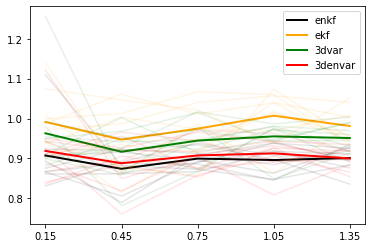

In [72]:
colors = ['black', 'orange', 'green', 'red']

for (da_s, val), color in zip(rmse_da_dict.items(), colors):
    for itimes in range(repeat_times):
        plt.plot(alphas, val[:,itimes], c=color, alpha=0.1)
    plt.plot(alphas, val.mean(axis=1), c=color, lw=2, label=da_s)
plt.legend()
plt.xticks(alphas);

## skew alpha 1.30~3.30

In [73]:
path = './repeat_experiments/alpha130_330'
da_schemes = ['enkf', 'ekf', '3dvar', '3denvar']
repeat_times = 10
alphas = [1.30, 1.55, 1.80, 2.05, 2.30, 2.55, 2.80, 3.05, 3.30]
rmse_da_dict = {}

for da_s in da_schemes:
    # 10 -> repeat experiments for 10 times
    rmse_alpha = []
    
    for alpha in alphas:
        rmsemean_list = []
        for t in range(repeat_times):
            fn = f'{path}/{da_s}_analysis_alpha{alpha*100:03.0f}_t{t}.npy'
            analysis = np.load(fn)

            if da_s == 'enkf':
                # ensemble mean
                analysis = analysis.mean(axis=0)

            rmse = RMSE(analysis, X_nature)
            rmse_mean = rmse.mean()
            rmsemean_list.append(rmse_mean)
            
        rmse_alpha.append(rmsemean_list)
        
    rmse_da_dict[da_s] = np.array(rmse_alpha)

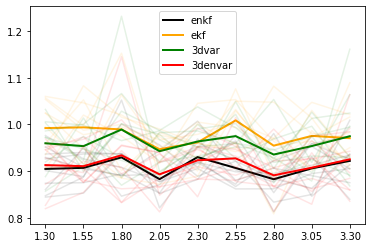

In [74]:
colors = ['black', 'orange', 'green', 'red']

for (da_s, val), color in zip(rmse_da_dict.items(), colors):
    for itimes in range(repeat_times):
        plt.plot(alphas, val[:,itimes], c=color, alpha=0.1)
    plt.plot(alphas, val.mean(axis=1), c=color, lw=2, label=da_s)
plt.legend()
plt.xticks(alphas);

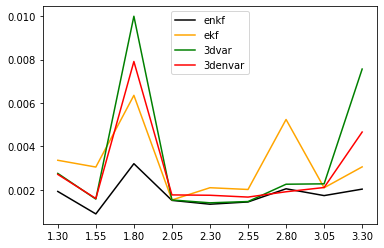

In [76]:
colors = ['black', 'orange', 'green', 'red']

for (da_s, val), color in zip(rmse_da_dict.items(), colors):
    plt.plot(alphas, val.var(axis=1), c=color, label=da_s)
plt.legend()
plt.xticks(alphas);